# (Ford GoBike System Data Exploration)
## by (Amr Barakat)

## Investigation Overview

> We her descripe the how rides effected by the customer type, age and the week days.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, we will try to get some insights from this database.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("fordgobike-tripdata.csv")
# convert start_time and end_time type to datetime type
df_clean = df
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

# fill the mssing birth_year with 0 and convert its type to integer

df_clean.member_birth_year = df_clean.member_birth_year.fillna(0)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)
df_clean["start_month"] = df_clean.start_time.dt.month
df_clean["start_day"] = df_clean.start_time.dt.day
df_clean["week day"] = df_clean.start_time.dt.day_name()
df_clean["start_hour"] = df_clean.start_time.dt.hour

df_clean["end_month"] = df_clean.end_time.dt.month
df_clean["end_day"] = df_clean.end_time.dt.day
df_clean['age'] = df_clean.member_birth_year.apply(lambda x: 2019 - x)
df_clean["duration_min"] = df_clean.duration_sec/60


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## ( Rides count per Age)

> The follwoing graph represnt the number of rides per Age, where we found from the above graphs that most of our memebers are between 25 and 35 years

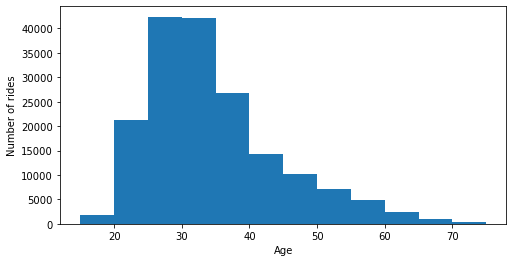

In [3]:
fig, ax = plt.subplots(figsize = [8,4])
bins = np.arange(15, 80, 5)
plt.hist(data = df_clean, x = 'age', bins = bins);
plt.xlabel('Age')
plt.ylabel('Number of rides')
plt.show()

## (Rides count in week days per user type)

> We found that the top day is Thursday for the both types but the lowest day is differnet as in subscriber is still the week end days (Saturday and Sunday) while it is Wednesday in the customer type.

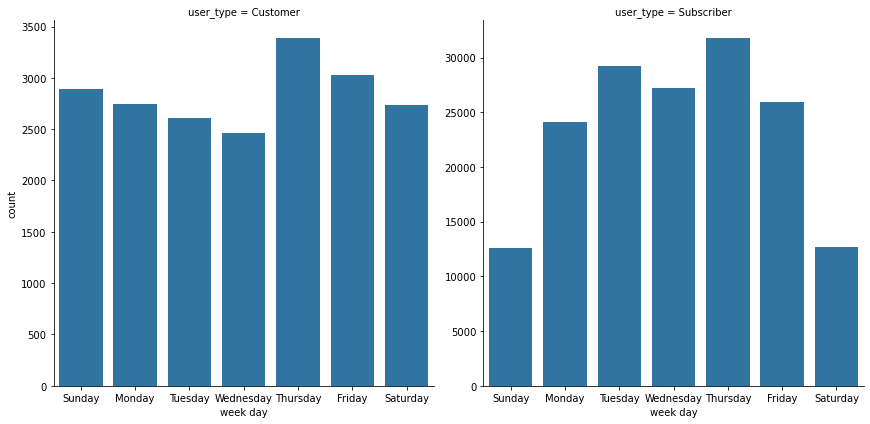

In [4]:
order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sb.catplot(data=df_clean, x='week day', col="user_type", kind='count', color = sb.color_palette()[0]
           , sharey = False, order = order, size = 6);

## (Ride duration in week day per user type)
> It appears that users specially customers use the service in weekends day (Saturady and Sunday) as kind of sport as ithe ride take moe time in these days.


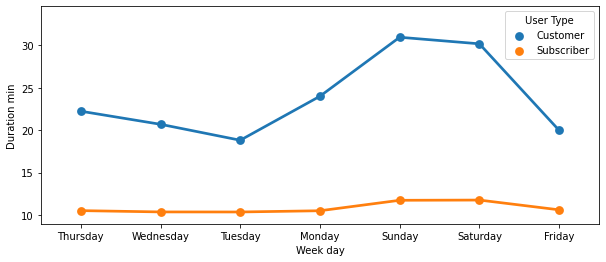

In [5]:
plt.figure(figsize=[10, 4])

# plot the point plot of month vs user type
sb.pointplot(data=df_clean, x='week day', y='duration_min', hue='user_type', errwidth=0)
plt.xlabel('Week day')
plt.ylabel('Duration min')
plt.legend(title ='User Type')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!